# Naive Bayes

Naive Bayes Machine Learing Model, 
Naive Bayes algoirthm, 
precision_score , recall_score , f1_score, 
Classification report

In [1]:
from pyforest import *
lazy_imports()

['import imutils',
 'import fastai',
 'import nltk',
 'from pathlib import Path',
 'import plotly.express as px',
 'import awswrangler as wr',
 'import sklearn',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import pickle',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from openpyxl import load_workbook',
 'from sklearn.linear_model import ElasticNet',
 'import datetime as dt',
 'from scipy import signal as sg',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import statistics',
 'import matplotlib.pyplot as plt',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.preprocessing import OneHotEncoder',
 'import torch',
 'from sklearn.manifold import TSNE',
 'import plotly.graph_objs as go',
 'import skimage',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.ensemble import RandomForestClassifier',
 '

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.head()

<IPython.core.display.Javascript object>

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Splitting the data

In [4]:
from sklearn.model_selection import train_test_split

x = df.drop('class' , axis = 1)
y = df['class']

x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 1 , test_size = 0.3)

In [5]:
x_train

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [6]:
 from sklearn.impute import SimpleImputer

replace_= SimpleImputer(missing_values = 0, strategy = 'mean')
cols = x_train.columns

x_train = pd.DataFrame(replace_.fit_transform(x_train))
x_test = pd.DataFrame(replace_.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


# Naive Bayes Algorithm

In [8]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train , y_train)

GaussianNB()

In [9]:
train_prediction = model.predict(x_train)
train_prediction

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [10]:
from sklearn import metrics

print("Model Accuaracy : {0:.4f}" . format(metrics.accuracy_score(y_train , train_prediction)))

Model Accuaracy : 0.7393


In [11]:
test_prediction = model.predict(x_test)
test_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [12]:
from sklearn import metrics

print("Model Accuaracy : {0:.4f}" . format(metrics.accuracy_score(y_test , test_prediction)))

Model Accuaracy : 0.7706


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

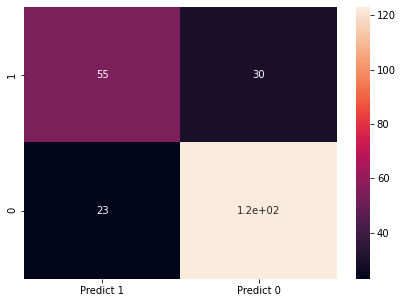

In [13]:
cm = metrics.confusion_matrix(y_test , test_prediction , labels= [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],
                     columns = [i for i in ['Predict 1' , 'Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm , annot = True)

In [14]:
from sklearn.metrics import precision_score , recall_score , f1_score

print("Classification Report")
print(metrics.classification_report(y_test , test_prediction , labels = [1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.65      0.67        85
           0       0.80      0.84      0.82       146

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

